#### OBJETIVO: Plots estadisticas MAIAC-AERONET segun ventanas espacio-temporales


In [21]:
#Librerias
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [16]:
#Abrir csv que guardamos con todas las metricas
metricas = pd.read_csv("D:/Josefina/Proyectos/MAIAC/V02/Code/02_Datasets/processed/final/metricas.csv")
# print(metricas)
# # Filtros para hacer los plots
metricas = metricas[metricas['collection'] == "C61"]
metricas = metricas[metricas['region'] == "latam"]
metricas


,region,num,estacion,metrica,temporal,espacial,valor,collection,min,max
4,latam,1.0,SP,bias,30.0,1.0,-0.0400,C61,0.0,0.0
5,latam,1.0,SP,bias,60.0,1.0,-0.0400,C61,0.0,0.0
6,latam,1.0,SP,bias,90.0,1.0,-0.0400,C61,0.0,0.0
7,latam,1.0,SP,bias,120.0,1.0,-0.0400,C61,0.0,0.0
12,latam,1.0,SP,bias,30.0,3.0,-0.0300,C61,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5067,latam,5.0,LP,reuMeanAOD promedio espacial,0.0,25.0,208.8900,C61,0.0,0.0
5068,latam,4.0,MD,reuMeanAOD promedio espacial,0.0,25.0,72.5700,C61,0.0,0.0
5069,latam,6.0,MX,reuMeanAOD promedio espacial,0.0,25.0,64.9175,C61,0.0,0.0
5070,latam,1.0,SP,reuMeanAOD promedio espacial,0.0,25.0,70.8550,C61,0.0,0.0


In [ ]:
##  R2
metricas['temporal'].dtype #float64
# Vemos los nombres de las metricas para no equivocarnos
np.unique(metricas['metrica'])
# Seleccion de metrica
metrica_interes = "r2" 
metricas_subset = metricas[metricas['metrica'] == metrica_interes]
# Seteamos para plotear las ventanas espacio-temporales

metricas_subset['buffer'] = pd.Categorical(
    metricas_subset['espacial'],
    categories=[1, 3, 5, 15, 25],
    ordered=True
)
# metricas_subset['buffer'] = pd.Categorical(
#     metricas_subset['temporal'],
#     categories=[30, 60, 90, 120],
#     ordered=True
# )

# Seteamos nombres de los sitios/estacion para poder ordenarlos como queremos
metricas_subset['ciudad'] = pd.Categorical(
    metricas_subset['estacion'],
    categories=["SP", "ST", "BA", "MD", "LP", "MX"],
    ordered=True
)
metricas_subset


C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\1627645663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['buffer'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\1627645663.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['ciudad'] = pd.Categorical(


,region,num,estacion,metrica,temporal,espacial,valor,collection,min,max,buffer,ciudad
730,latam,1.0,SP,r2,30.0,1.0,0.83,C61,0.0,0.0,1,SP
731,latam,1.0,SP,r2,60.0,1.0,0.79,C61,0.0,0.0,1,SP
732,latam,1.0,SP,r2,90.0,1.0,0.77,C61,0.0,0.0,1,SP
733,latam,1.0,SP,r2,120.0,1.0,0.75,C61,0.0,0.0,1,SP
738,latam,1.0,SP,r2,30.0,3.0,0.71,C61,0.0,0.0,3,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
957,latam,6.0,MX,r2,120.0,15.0,0.60,C61,0.0,0.0,15,MX
962,latam,6.0,MX,r2,30.0,25.0,0.56,C61,0.0,0.0,25,MX
963,latam,6.0,MX,r2,60.0,25.0,0.54,C61,0.0,0.0,25,MX
964,latam,6.0,MX,r2,90.0,25.0,0.55,C61,0.0,0.0,25,MX


C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\3558116944.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['ciudad', 'buffer'], as_index=False)['valor']
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\3558116944.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


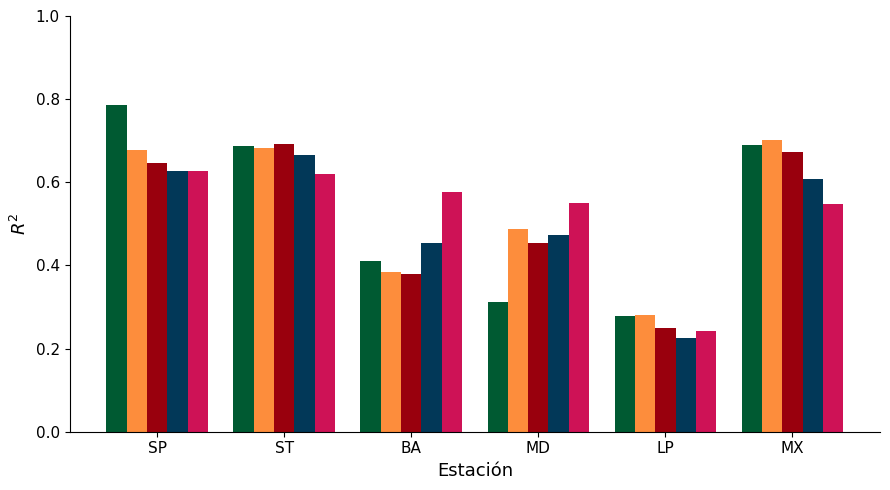

In [ ]:
#################################################################
#--- Plots varios seleccionar el mejor
# Grafico de barras agrupadas
metricas_plot = (
    metricas_subset
    .groupby(['ciudad', 'buffer'], as_index=False)['valor']
    .mean()   # o .first() si sabés que hay un solo valor
)


ciudades = metricas_plot['ciudad'].unique()
buffers = metricas_plot['buffer'].cat.categories

x = np.arange(len(ciudades))
width = 0.8 / len(buffers)

colors = ["#005a32", "#fd8d3c", "#99000d", "#023858", "#ce1256"]

fig, ax = plt.subplots(figsize=(9, 5))

for i, (buffer, color) in enumerate(zip(buffers, colors)):
    subset = metricas_plot[metricas_plot['buffer'] == buffer]
    subset = subset.set_index('ciudad').reindex(ciudades)

    ax.bar(
        x + i * width,
        subset['valor'],
        width=width,
        color=color
    )

ax.set_xticks(x + width * (len(buffers) - 1) / 2)
ax.set_xticklabels(ciudades)
ax.set_xlabel("Estación", fontsize=13)
ax.set_ylabel(r"$R^2$", fontsize=13)

ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=11)

# Sin leyenda (como en R)
ax.legend().remove()

plt.tight_layout()
plt.show()

#Guardar
# Guardar plot
# fig.savefig(
#     r"D:/Josefina/Proyectos/Tesis/plot/01-MAIAC_Performance/MAIAC-C61-AER-Latam-R2.png",
#     dpi=500,
#     bbox_inches="tight"
# )


C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\2482428486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['buffer'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\2482428486.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['ciudad'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\2482428486.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

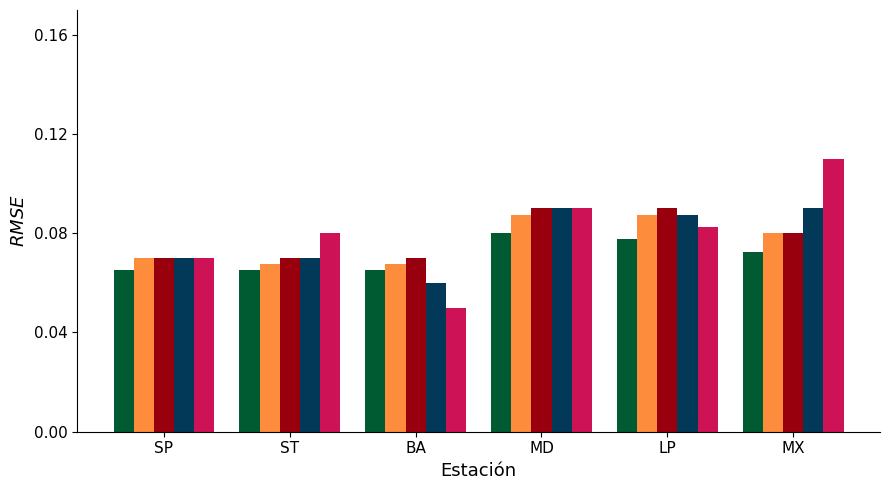

In [30]:
#### RMSE

##  R2
metricas['temporal'].dtype #float64
# Vemos los nombres de las metricas para no equivocarnos
np.unique(metricas['metrica'])
# Seleccion de metrica
metrica_interes = "rmse" 
metricas_subset = metricas[metricas['metrica'] == metrica_interes]
# Seteamos para plotear las ventanas espacio-temporales

metricas_subset['buffer'] = pd.Categorical(
    metricas_subset['espacial'],
    categories=[1, 3, 5, 15, 25],
    ordered=True
)
# metricas_subset['buffer'] = pd.Categorical(
#     metricas_subset['temporal'],
#     categories=[30, 60, 90, 120],
#     ordered=True
# )

# Seteamos nombres de los sitios/estacion para poder ordenarlos como queremos
metricas_subset['ciudad'] = pd.Categorical(
    metricas_subset['estacion'],
    categories=["SP", "ST", "BA", "MD", "LP", "MX"],
    ordered=True
)
metricas_subset


#################################################################
#--- Plots varios seleccionar el mejor
# Grafico de barras agrupadas
metricas_plot = (
    metricas_subset
    .groupby(['ciudad', 'buffer'], as_index=False)['valor']
    .mean()   # o .first() si sabés que hay un solo valor
)


ciudades = metricas_plot['ciudad'].unique()
buffers = metricas_plot['buffer'].cat.categories

x = np.arange(len(ciudades))
width = 0.8 / len(buffers)

colors = ["#005a32", "#fd8d3c", "#99000d", "#023858", "#ce1256"]

fig, ax = plt.subplots(figsize=(9, 5))

for i, (buffer, color) in enumerate(zip(buffers, colors)):
    subset = metricas_plot[metricas_plot['buffer'] == buffer]
    subset = subset.set_index('ciudad').reindex(ciudades)

    ax.bar(
        x + i * width,
        subset['valor'],
        width=width,
        color=color
    )

ax.set_xticks(x + width * (len(buffers) - 1) / 2)
ax.set_xticklabels(ciudades)
ax.set_xlabel("Estación", fontsize=13)
ax.set_ylabel(r"$RMSE$", fontsize=13)

ax.set_ylim(0, 0.17)
ax.set_yticks([0, 0.04, 0.08, 0.12, 0.16])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=11)

# Sin leyenda (como en R)
ax.legend().remove()

plt.tight_layout()
plt.show()

#Guardar
# Guardar plot
# fig.savefig(
#     r"D:/Josefina/Proyectos/Tesis/plot/01-MAIAC_Performance/MAIAC-C61-AER-Latam-R2.png",
#     dpi=500,
#     bbox_inches="tight"
# )

C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\969128992.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['buffer'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\969128992.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['ciudad'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\969128992.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future

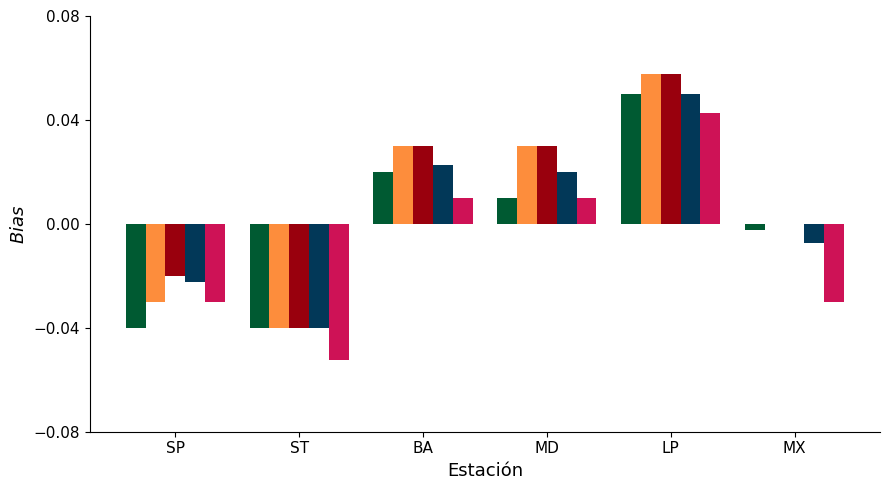

In [38]:
#### BIAS

metricas['temporal'].dtype #float64
# Vemos los nombres de las metricas para no equivocarnos
np.unique(metricas['metrica'])
# Seleccion de metrica
metrica_interes = "bias" 
metricas_subset = metricas[metricas['metrica'] == metrica_interes]
# Seteamos para plotear las ventanas espacio-temporales

metricas_subset['buffer'] = pd.Categorical(
    metricas_subset['espacial'],
    categories=[1, 3, 5, 15, 25],
    ordered=True
)
# metricas_subset['buffer'] = pd.Categorical(
#     metricas_subset['temporal'],
#     categories=[30, 60, 90, 120],
#     ordered=True
# )

# Seteamos nombres de los sitios/estacion para poder ordenarlos como queremos
metricas_subset['ciudad'] = pd.Categorical(
    metricas_subset['estacion'],
    categories=["SP", "ST", "BA", "MD", "LP", "MX"],
    ordered=True
)
metricas_subset


#################################################################
#--- Plots varios seleccionar el mejor
# Grafico de barras agrupadas
metricas_plot = (
    metricas_subset
    .groupby(['ciudad', 'buffer'], as_index=False)['valor']
    .mean()   # o .first() si sabés que hay un solo valor
)


ciudades = metricas_plot['ciudad'].unique()
buffers = metricas_plot['buffer'].cat.categories

x = np.arange(len(ciudades))
width = 0.8 / len(buffers)

colors = ["#005a32", "#fd8d3c", "#99000d", "#023858", "#ce1256"]

fig, ax = plt.subplots(figsize=(9, 5))

for i, (buffer, color) in enumerate(zip(buffers, colors)):
    subset = metricas_plot[metricas_plot['buffer'] == buffer]
    subset = subset.set_index('ciudad').reindex(ciudades)

    ax.bar(
        x + i * width,
        subset['valor'],
        width=width,
        color=color
    )

ax.set_xticks(x + width * (len(buffers) - 1) / 2)
ax.set_xticklabels(ciudades)
ax.set_xlabel("Estación", fontsize=13)
ax.set_ylabel(r"$Bias$", fontsize=13)

ax.set_ylim(-0.08, 0.08)
ax.set_yticks([-0.08, -0.04,0, 0.04, 0.08])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=11)

# Sin leyenda (como en R)
ax.legend().remove()

plt.tight_layout()
plt.show()

#Guardar
# Guardar plot
# fig.savefig(
#     r"D:/Josefina/Proyectos/Tesis/plot/01-MAIAC_Performance/MAIAC-C61-AER-Latam-R2.png",
#     dpi=500,
#     bbox_inches="tight"
# )

C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\3104736369.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['buffer'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\3104736369.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metricas_subset['ciudad'] = pd.Categorical(
C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_15752\3104736369.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fut

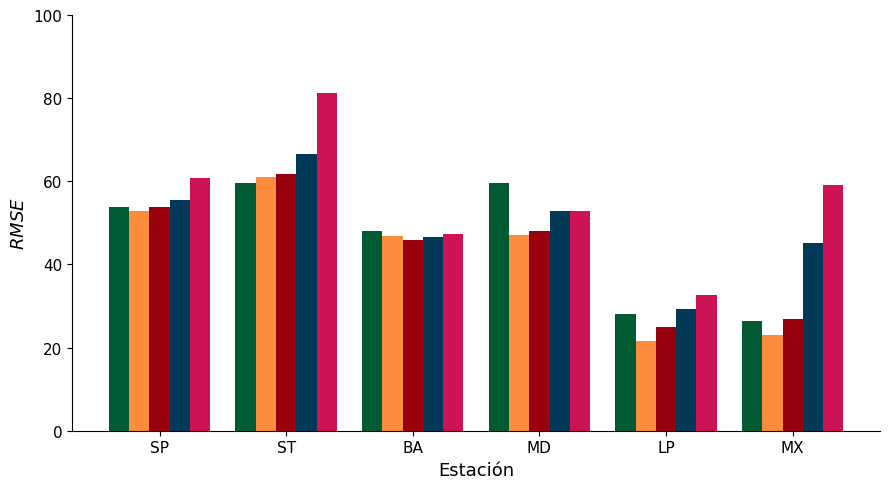

In [ ]:
#### REU

metricas['temporal'].dtype #float64
# Vemos los nombres de las metricas para no equivocarnos
np.unique(metricas['metrica'])
# Seleccion de metrica
metrica_interes = "reu" 
metricas_subset = metricas[metricas['metrica'] == metrica_interes]
# Seteamos para plotear las ventanas espacio-temporales

metricas_subset['buffer'] = pd.Categorical(
    metricas_subset['espacial'],
    categories=[1, 3, 5, 15, 25],
    ordered=True
)
# metricas_subset['buffer'] = pd.Categorical(
#     metricas_subset['temporal'],
#     categories=[30, 60, 90, 120],
#     ordered=True
# )

# Seteamos nombres de los sitios/estacion para poder ordenarlos como queremos
metricas_subset['ciudad'] = pd.Categorical(
    metricas_subset['estacion'],
    categories=["SP", "ST", "BA", "MD", "LP", "MX"],
    ordered=True
)
metricas_subset


#################################################################
#--- Plots varios seleccionar el mejor
# Grafico de barras agrupadas
metricas_plot = (
    metricas_subset
    .groupby(['ciudad', 'buffer'], as_index=False)['valor']
    .mean()   # o .first() si sabés que hay un solo valor
)


ciudades = metricas_plot['ciudad'].unique()
buffers = metricas_plot['buffer'].cat.categories

x = np.arange(len(ciudades))
width = 0.8 / len(buffers)

colors = ["#005a32", "#fd8d3c", "#99000d", "#023858", "#ce1256"]

fig, ax = plt.subplots(figsize=(9, 5))

for i, (buffer, color) in enumerate(zip(buffers, colors)):
    subset = metricas_plot[metricas_plot['buffer'] == buffer]
    subset = subset.set_index('ciudad').reindex(ciudades)

    ax.bar(
        x + i * width,
        subset['valor'],
        width=width,
        color=color
    )

ax.set_xticks(x + width * (len(buffers) - 1) / 2)
ax.set_xticklabels(ciudades)
ax.set_xlabel("Estación", fontsize=13)
ax.set_ylabel(r"$REU$", fontsize=13)

ax.set_ylim(0,100)
ax.set_yticks([0,20,40,60,80,100])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', labelsize=11)

# Sin leyenda (como en R)
ax.legend().remove()

plt.tight_layout()
plt.show()

#Guardar
# Guardar plot
# fig.savefig(
#     r"D:/Josefina/Proyectos/Tesis/plot/01-MAIAC_Performance/MAIAC-C61-AER-Latam-R2.png",
#     dpi=500,
#     bbox_inches="tight"
# )